# Test Cascade and Parallel NAS deployed on the XEM7310 Artix-7 board using the OKAERTool

This notebook is a simple example of how to test the Cascade and Parallel NAS model deployed both on the XEM7310 Artix-7 board using the OKAERTool (deployed on the same FPGA board too). The pyOKAERTool is a Python package that provides a simple interface to interact with the OKAERTool IP block. The OKAERTool IP an open-source hardware platform that can be used to deploy and test AER based systems on the edge.

## Monitoring the CPNAS outputs
The okaertool is deployed on the Artix-7 FPGA where a stereo 64 channels Cascade and Parallel NAS are deployed. The script below initializes the OKAERTool and configure the settings to pyNAVIS tool. This tool is used to visualize the AER events received from the Neuromorphic Auditory Sensor (NAS).

In [ ]:
import sys
import pyOKAERTool as okt
from pyNAVIS import *
import time

# Create a new intance of the OkaerTool class and initialize it
okaer = okt.Okaertool(bit_file=None)
okaer.init()

# Create a new instance of the PyNAVIS class
settings = MainSettings(num_channels=64, mono_stereo=1, on_off_both=1, address_size=4, ts_tick=0.01, bin_size=10000)

09/29/25 10:12:23 AM - INFO : No bit file loaded. Ensure that the FPGA is already programmed
09/29/25 10:12:23 AM - INFO : okaertool initialized as idle


### Configure Cascade and Parallel NAS
Both NAS sensors need to be configure before testing. The configuration is done using the `set_config` method of the OKAERTool class. The configuration parameters are passed as a list of values. The parameters are:
- PDM2Spikes_DEFAULT_parameter
- I2S2Spikes_DEFAULT_parameter
- CASCADE_FILTER_DEFAULT_parameter
- PARALLEL_FILTER_DEFAULT_parameter


In [4]:
PDM2Spikes_DEFAULT_parameter = [0x0005, 0x0006, 0x734B, 0x39C8]
I2S2Spikes_DEFAULT_parameter = [0x000F]

CASCADE_FILTER_DEFAULT_parameter = [
    	0x04, 0x77B4, 0x77B4, 0x2025, 
		0x04, 0x6B1C, 0x6B1C, 0x2025,
		0x02, 0x7303, 0x7303, 0x2025, 
		0x02, 0x66E9, 0x66E9, 0x2025, 
		0x03, 0x7AC8, 0x7AC8, 0x2025, 
		0x03, 0x6DDD, 0x6DDD, 0x2025, 
		0x04, 0x7AE1, 0x7AE1, 0x2025, 
		0x04, 0x6DF4, 0x6DF4, 0x2025, 
		0x02, 0x7610, 0x7610, 0x2025, 
		0x02, 0x69A4, 0x69A4, 0x2025, 
		0x03, 0x7E0A, 0x7E0A, 0x2025, 
		0x03, 0x70C7, 0x70C7, 0x2025, 
		0x04, 0x7E24, 0x7E24, 0x2025, 
		0x04, 0x70DF, 0x70DF, 0x2025, 
		0x02, 0x7932, 0x7932, 0x2025, 
		0x02, 0x6C72, 0x6C72, 0x2025, 
		0x02, 0x6109, 0x6109, 0x2025, 
		0x03, 0x73C5, 0x73C5, 0x2025, 
		0x03, 0x6797, 0x6797, 0x2025, 
		0x04, 0x73DD, 0x73DD, 0x2025, 
		0x02, 0x7C69, 0x7C69, 0x2025, 
		0x02, 0x6F52, 0x6F52, 0x2025, 
		0x02, 0x639C, 0x639C, 0x2025, 
		0x03, 0x76D8, 0x76D8, 0x2025, 
		0x03, 0x6A57, 0x6A57, 0x2025, 
		0x04, 0x76F1, 0x76F1, 0x2025, 
		0x02, 0x7FB6, 0x7FB6, 0x2025, 
		0x02, 0x7247, 0x7247, 0x2025, 
		0x02, 0x6641, 0x6641, 0x2025, 
		0x03, 0x79FF, 0x79FF, 0x2025, 
		0x03, 0x6D29, 0x6D29, 0x2025, 
		0x04, 0x7A19, 0x7A19, 0x2025, 
		0x04, 0x6D40, 0x6D40, 0x2025, 
		0x02, 0x754F, 0x754F, 0x2025, 
		0x02, 0x68F7, 0x68F7, 0x2025, 
		0x03, 0x7D3C, 0x7D3C, 0x2025, 
		0x03, 0x700F, 0x700F, 0x2025, 
		0x04, 0x7D56, 0x7D56, 0x2025, 
		0x04, 0x7026, 0x7026, 0x2025, 
		0x02, 0x786C, 0x786C, 0x2025, 
		0x02, 0x6BC1, 0x6BC1, 0x2025, 
		0x02, 0x606A, 0x606A, 0x2025, 
		0x03, 0x7308, 0x7308, 0x2025, 
		0x03, 0x66EE, 0x66EE, 0x2025, 
		0x04, 0x7320, 0x7320, 0x2025, 
		0x02, 0x7B9E, 0x7B9E, 0x2025, 
		0x02, 0x6E9C, 0x6E9C, 0x2025, 
		0x02, 0x62F9, 0x62F9, 0x2025, 
		0x03, 0x7615, 0x7615, 0x2025, 
		0x03, 0x69A9, 0x69A9, 0x2025, 
		0x04, 0x762E, 0x762E, 0x2025, 
		0x02, 0x7EE6, 0x7EE6, 0x2025, 
		0x02, 0x718C, 0x718C, 0x2025, 
		0x02, 0x659A, 0x659A, 0x2025, 
		0x03, 0x7937, 0x7937, 0x2025, 
		0x03, 0x6C77, 0x6C77, 0x2025, 
		0x04, 0x7951, 0x7951, 0x2025, 
		0x04, 0x6C8E, 0x6C8E, 0x2025, 
		0x02, 0x748F, 0x748F, 0x2025, 
		0x02, 0x684C, 0x684C, 0x2025, 
		0x03, 0x7C6F, 0x7C6F, 0x2025, 
		0x03, 0x6F57, 0x6F57, 0x2025,
		0x04, 0x7C89, 0x7C89, 0x2025, 
		0x04, 0x6F6F, 0x6F6F, 0x2025, 
		0x02, 0x77A7, 0x77A7, 0x2025]

PARALLEL_FILTER_DEFAULT_parameter = [
    	0x00, 0x7FFF, 0x1012, 0x5E5C, 
		0x00, 0x7FFF, 0x1012, 0x546E, 
		0x00, 0x7FFF, 0x1012, 0x4B8C,
		0x00, 0x7FFF, 0x1012, 0x439A, 
		0x00, 0x7FFF, 0x1012, 0x78FB, 
		0x00, 0x7FFF, 0x1012, 0x6C41, 
		0x00, 0x7FFF, 0x1012, 0x60DD,
		0x00, 0x7FFF, 0x1012, 0x56AC, 
		0x00, 0x7FFF, 0x1012, 0x4D8E, 
		0x00, 0x7FFF, 0x1012, 0x4565, 
		0x00, 0x7FFF, 0x1012, 0x7C31,
		0x00, 0x7FFF, 0x1012, 0x6F20, 
		0x00, 0x7FFF, 0x1012, 0x636F, 
		0x00, 0x7FFF, 0x1012, 0x58F9, 
		0x00, 0x7FFF, 0x1012, 0x4F9C,
		0x00, 0x7FFF, 0x1012, 0x473C, 
		0x00, 0x7FFF, 0x1012, 0x7F7D, 
		0x00, 0x7FFF, 0x1012, 0x7213, 
		0x00, 0x7FFF, 0x1012, 0x6612,
		0x00, 0x7FFF, 0x1012, 0x5B55, 
		0x00, 0x7FFF, 0x1012, 0x51B9, 
		0x00, 0x7FFF, 0x1012, 0x4920, 
		0x00, 0x7FFF, 0x1012, 0x416F,
		0x00, 0x7FFF, 0x1012, 0x751A, 
		0x00, 0x7FFF, 0x1012, 0x68C8, 
		0x00, 0x7FFF, 0x1012, 0x5DC2, 
		0x00, 0x7FFF, 0x1012, 0x53E4,
		0x00, 0x7FFF, 0x1012, 0x4B11, 
		0x00, 0x7FFF, 0x1012, 0x432B, 
		0x00, 0x7FFF, 0x1012, 0x7835, 
		0x00, 0x7FFF, 0x1012, 0x6B90,
		0x00, 0x7FFF, 0x1012, 0x603F, 
		0x00, 0x7FFF, 0x1012, 0x561E, 
		0x00, 0x7FFF, 0x1012, 0x4D0F, 
		0x00, 0x7FFF, 0x1012, 0x44F3,
		0x00, 0x7FFF, 0x1012, 0x7B66, 
		0x00, 0x7FFF, 0x1012, 0x6E6A, 
		0x00, 0x7FFF, 0x1012, 0x62CC, 
		0x00, 0x7FFF, 0x1012, 0x5867,
		0x00, 0x7FFF, 0x1012, 0x4F1A, 
		0x00, 0x7FFF, 0x1012, 0x46C8, 
		0x00, 0x7FFF, 0x1012, 0x7EAC, 
		0x00, 0x7FFF, 0x1012, 0x7158,
		0x00, 0x7FFF, 0x1012, 0x656C, 
		0x00, 0x7FFF, 0x1012, 0x5AC0, 
		0x00, 0x7FFF, 0x1012, 0x5134, 
		0x00, 0x7FFF, 0x1012, 0x48A9,
		0x00, 0x7FFF, 0x1012, 0x4104, 
		0x00, 0x7FFF, 0x1012, 0x745A, 
		0x00, 0x7FFF, 0x1012, 0x681D, 
		0x00, 0x7FFF, 0x1012, 0x5D28,
		0x00, 0x7FFF, 0x1012, 0x535B, 
		0x00, 0x7FFF, 0x1012, 0x4A96, 
		0x00, 0x7FFF, 0x1012, 0x42BD, 
		0x00, 0x7FFF, 0x1012, 0x7771,
		0x00, 0x7FFF, 0x1012, 0x6AE0, 
		0x00, 0x7FFF, 0x1012, 0x5FA1, 
		0x00, 0x7FFF, 0x1012, 0x5592, 
		0x00, 0x7FFF, 0x1012, 0x4C91,
		0x00, 0x7FFF, 0x1012, 0x4483, 
		0x00, 0x7FFF, 0x1012, 0x7A9C, 
		0x00, 0x7FFF, 0x1012, 0x6DB6, 
		0x00, 0x7FFF, 0x1012, 0x622B,
		0x00, 0x7FFF, 0x1012, 0x57D7, 
		0x00, 0x7FFF, 0x1012, 0x57D7]

# Configure the PDM2Spikes (left and right) for both NAS
register_address = 0x0000
okaer.logger.info("Configuring PDM2Spikes modules for both NAS")
# Left cochlea
okaer.logger.info("Left cochlea")
for value in PDM2Spikes_DEFAULT_parameter:
    okaer.set_config('port_a', register_address, value)
    okaer.set_config('port_b', register_address, value)
    register_address += 1
# Right cochlea
okaer.logger.info("Right cochlea")
for value in PDM2Spikes_DEFAULT_parameter:
    okaer.set_config('port_a', register_address, value)
    okaer.set_config('port_b', register_address, value)
    register_address += 1

register_address = 0x08
okaer.logger.info("Configuring I2S2Spikes modules for both NAS")
# Configure I2S2Spikes modules for both NAS
for value in I2S2Spikes_DEFAULT_parameter:
    okaer.set_config('port_a', register_address, value)
    okaer.set_config('port_b', register_address, value)

# Configure the filters for CASCADE NAS
register_address = 0x09
okaer.logger.info("Configuring filters for Cascade NAS")
# Left cochlea
okaer.logger.info("Left cochlea")
for value in CASCADE_FILTER_DEFAULT_parameter:
    okaer.set_config('port_a', register_address, value)
    register_address += 1
# Right cochlea
okaer.logger.info("Right cochlea")
for value in CASCADE_FILTER_DEFAULT_parameter:
    okaer.set_config('port_a', register_address, value)
    register_address += 1 

# Configure the filters for PARALLEL NAS
register_address = 0x09
okaer.logger.info("Configuring filters for Parallel NAS")
# Left cochlea
okaer.logger.info("Left cochlea")
for value in PARALLEL_FILTER_DEFAULT_parameter:
    okaer.set_config('port_b', register_address, value)
    register_address += 1
# Right cochlea
okaer.logger.info("Right cochlea")
for value in PARALLEL_FILTER_DEFAULT_parameter:
    okaer.set_config('port_b', register_address, value)
    register_address += 1


09/29/25 09:56:32 AM - INFO : Configuring PDM2Spikes modules for both NAS
09/29/25 09:56:32 AM - INFO : Left cochlea
09/29/25 09:56:32 AM - INFO : Configuring port_a with address 0x0 and value 0x5
09/29/25 09:56:32 AM - INFO : Configuring port_b with address 0x0 and value 0x5
09/29/25 09:56:32 AM - INFO : Configuring port_a with address 0x1 and value 0x6
09/29/25 09:56:32 AM - INFO : Configuring port_b with address 0x1 and value 0x6
09/29/25 09:56:32 AM - INFO : Configuring port_a with address 0x2 and value 0x734b
09/29/25 09:56:32 AM - INFO : Configuring port_b with address 0x2 and value 0x734b
09/29/25 09:56:32 AM - INFO : Configuring port_a with address 0x3 and value 0x39c8
09/29/25 09:56:32 AM - INFO : Configuring port_b with address 0x3 and value 0x39c8
09/29/25 09:56:32 AM - INFO : Right cochlea
09/29/25 09:56:32 AM - INFO : Configuring port_a with address 0x4 and value 0x5
09/29/25 09:56:32 AM - INFO : Configuring port_b with address 0x4 and value 0x5
09/29/25 09:56:32 AM - INFO

KeyboardInterrupt: 

### Monitor de NAS outputs
The script below monitors the output of the NAS.

09/29/25 10:12:37 AM - INFO : Board reset
09/29/25 10:12:37 AM - INFO : Buffer length: 1024
09/29/25 10:12:38 AM - INFO : Monitoring duration: 0.5002343654632568 seconds
09/29/25 10:12:38 AM - INFO : Number of spikes: 211584. Number of read bytes: 1692672
09/29/25 10:12:38 AM - INFO : Input 0: 210750 spikes
09/29/25 10:12:38 AM - INFO : Input 1: 0 spikes
09/29/25 10:12:38 AM - INFO : Input 2: 0 spikes
09/29/25 10:12:38 AM - INFO : Creating spike files for all selected inputs
09/29/25 10:12:38 AM - INFO : Ploting the spikegram for input port_a
09/29/25 10:12:38 AM - INFO : Ploting the sonogram for input port_a
09/29/25 10:12:38 AM - INFO : Ploting the histogram for input port_a
09/29/25 10:12:38 AM - INFO : Ploting the average activity for input port_a


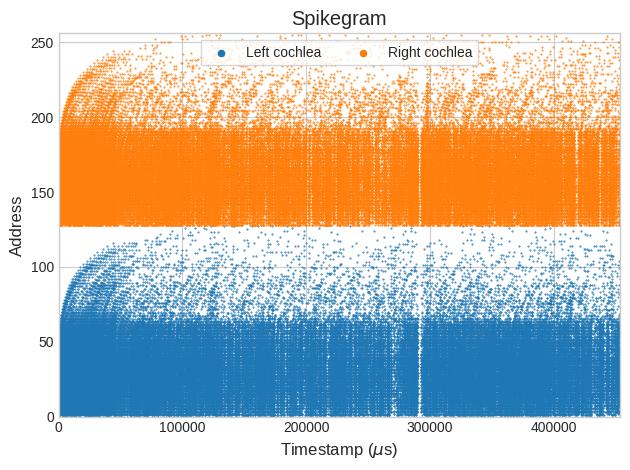

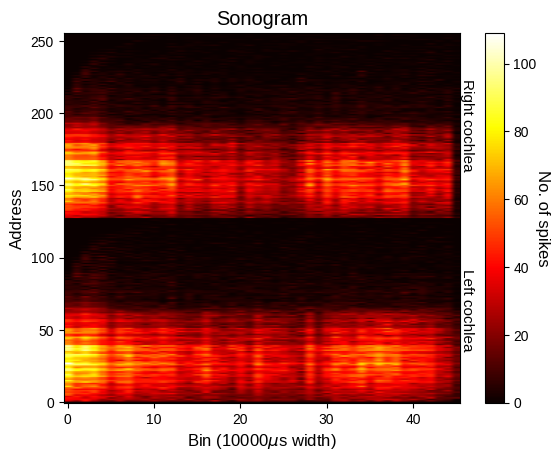

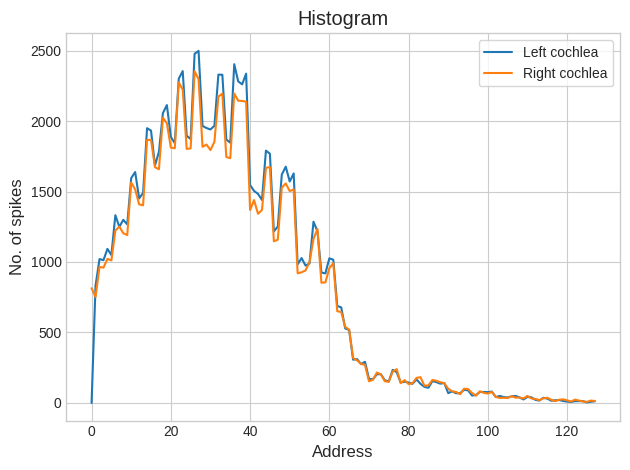

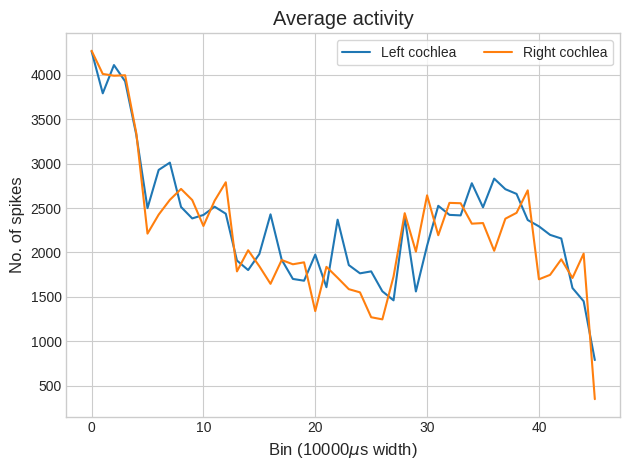

In [ ]:
# Reset the OkaerTool
okaer.reset_board()

# Monitor the inputs
MAX_INPUTS = 3
INPUTS = ['port_a']
MAX_SPIKES = 10000000
DURATION = 0.5 # in seconds

# # Monitor for a specific number of spikes
# spikes = okaer.monitor(inputs=INPUTS, max_spikes=MAX_SPIKES)
# Monitor for a specific duration
spikes = okaer.monitor(inputs=INPUTS, duration=DURATION)
# # Monitor for a specific duration or until max_spikes is reached
# spikes = okaer.monitor(inputs=INPUTS, max_spikes=MAX_SPIKES, duration=DURATION)
# # Monitor forever
# okaer.monitor_forever(inputs=INPUTS)
# time.sleep(DURATION)
# spikes = okaer.monitor_stop()

# Check if spikes is not None. If so, finish the script
if spikes is None:
    okaer.logger.error("No spikes were recorded. Exiting the script.")
    sys.exit(1)
    
# Print the number of spikes for each input
for i in range(MAX_INPUTS):
    okaer.logger.info("Input %d: %d spikes", i, spikes[i].get_num_spikes())

# Create pyNAVIS spike_file only if there are spikes for a specific input
okaer.logger.info("Creating spike files for all selected inputs")
spike_files = []
for i in range(MAX_INPUTS):
    if spikes[i].get_num_spikes() > 0:
        spike_files.append(SpikesFile(addresses=spikes[i].addresses, timestamps=spikes[i].timestamps))
        # Convert the relative timestamps to absolute timestamps.
        absolute_timestamp = []
        absolute_timestamp.append(spikes[i].timestamps[0])
        for i_ts in range(1, len(spikes[i].timestamps)):
            absolute_timestamp.append(spikes[i].timestamps[i_ts] + absolute_timestamp[i_ts-1])
        # Check if the length of absolute_timestamp is the same as spikes[i].timestamps
        if len(absolute_timestamp) != len(spikes[i].timestamps):
            okaer.logger.error("Error in converting relative timestamps to absolute timestamps for input %s", INPUTS[i])
            sys.exit(1)
        spikes[i].timestamps = absolute_timestamp
        # Substract the first timestamp to have the timestamps starting from zero
        first_timestamp = spikes[i].timestamps[0]
        for j in range(len(spikes[i].timestamps)):
            spikes[i].timestamps[j] = spikes[i].timestamps[j] - first_timestamp
        # Check if the previous timestamp is smaller than the current timestamp
        for j in range(1, len(spikes[i].timestamps)):
            if spikes[i].timestamps[j] < spikes[i].timestamps[j-1]:
                okaer.logger.error("Error in timestamps order for input %s", INPUTS[i])
                sys.exit(1)

for i in range(len(spike_files)):
    okaer.logger.info("Ploting the spikegram for input %s", INPUTS[i])
    Plots.spikegram(spike_files[i], settings)

for i in range(len(spike_files)):
    okaer.logger.info("Ploting the sonogram for input %s", INPUTS[i])
    Plots.sonogram(spike_files[i], settings)

for i in range(len(spike_files)):
    okaer.logger.info("Ploting the histogram for input %s", INPUTS[i])
    Plots.histogram(spike_files[i], settings)

for i in range(len(spike_files)):
    okaer.logger.info("Ploting the average activity for input %s", INPUTS[i])
    Plots.average_activity(spike_files[i], settings)


### Bypassing the NAS output to OKAERTool output data bus
The NAS output can be bypassed to the OKAERTool output data bus using the `bypass` command of the OKAERTool class. This is useful to test the NAS output without the OKAERTool processing. The script below bypasses the NAS output to the OKAERTool output data bus.

In [5]:
# Reset the OkaerTool
okaer.reset_board()

# Monitor the inputs
INPUTS = ['port_a']

# Bypass the inputs to the outputs
okaer.bypass(inputs=INPUTS)

09/29/25 10:00:09 AM - INFO : Board reset
09/29/25 10:00:09 AM - INFO : Bypassing data over ['port_a']
